In [1]:
import numpy as np
import awkward as ak
np.random.seed(1337)  # for reproducibility
import h5py
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.initializers import TruncatedNormal
from keras.layers import Reshape, Input, Dense, Dropout, Flatten, Conv3D, MaxPooling3D,Conv2D, MaxPooling2D,BatchNormalization,AveragePooling2D, concatenate
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

import utils as pic
%load_ext autoreload
%autoreload 2

In [2]:
lr_init     = 1.e-3    # Initial learning rate  
batch_size  = 64       # Training batch size
train_size  = 1024     # Training size
valid_size  = 1024     # Validation size
test_size   = 1024     # Test size
epochs      = 5       # Number of epochs
tmin        = -0.1    # Minimum time cutoff
tmax        = 0.1     # Maximum time cutoff
tstep       = 0.0099   # Time steps

In [3]:
# Set range of training set
train_start, train_stop = 0, train_size
assert train_stop > train_start
assert (len(pic.decays)*train_size) % batch_size == 0
X_train, y_train = pic.load_data(train_start,train_stop)

# Set range of validation set
valid_start, valid_stop = 160000, 160000+valid_size
assert valid_stop  >  valid_start
assert valid_start >= train_stop
X_valid, y_valid = pic.load_data(valid_start,valid_stop)

# Set range of test set
test_start, test_stop = 204800, 204800+test_size
assert test_stop  >  test_start
assert test_start >= valid_stop
X_test, y_test = pic.load_data(test_start,test_stop)

samples_requested = len(pic.decays) * (train_size + valid_size + test_size)
samples_available = len(y_train) + len(y_valid) + len(y_test)
assert samples_requested == samples_available

In [4]:
X_e_train_cut, X_t_train, maxframes, time_bins = pic.timeordered_BC(X_train,cutoff=0.1, remove_empty=True, cumulative=True, normalize=True, min_t=tmin, max_t=tmax, t_step=tstep )
y_b_train = to_categorical(y_train)

In [5]:
X_e_train, X_t_train, maxframes, time_bins = pic.timeordered_BC(X_train,cutoff=0., remove_empty=True, cumulative=True, normalize=True, min_t=tmin, max_t=tmax, t_step=tstep )
y_b_train = to_categorical(y_train)

In [6]:
X_e_train.shape

(2048, 21, 32, 32)

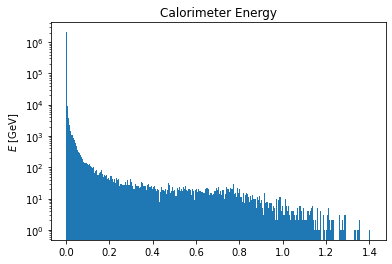

In [7]:
#Plot 
#pic.plot_abstime(X_train,y_train,bins=100,energy_weights=False,figax=None)
pic.plot_energy(X_train)

In [17]:
X_e_valid_cut, X_t_valid, maxframes, time_bins = pic.timeordered_BC(X_valid,cutoff=0.1,cumulative=True, remove_empty=True,normalize=True, min_t=tmin, max_t=tmax, t_step=tstep )
y_b_valid = to_categorical(y_valid)